In [3]:
using Plots
using Interact

INFO: Interact.jl: using new nbwidgetsextension protocol


In [4]:
default_epsilon = 0.3226
default_kappa = 1.590
default_delta = 0.333
default_radius = 9.0722
default_sigma = 0.1

return

In [5]:
function itr(cur_value::AbstractFloat, cur_count=11)
    dif_value = cur_value * 0.7
    min_value = cur_value - dif_value
    max_value = cur_value + dif_value
    linspace(min_value, max_value, cur_count)
end

itr (generic function with 2 methods)

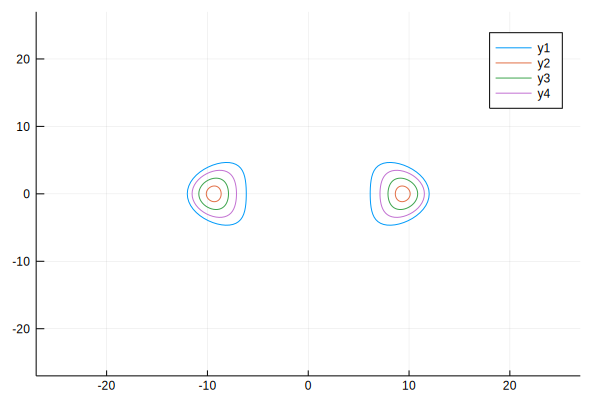

In [8]:
@manipulate for epsilon=itr(default_epsilon), kappa=itr(default_kappa), delta=itr(default_delta), radius=itr(default_radius), sigma=itr(default_sigma)
    tmp_val_1 = 0.3 * ( 1 - delta ^ 2 )
    tmp_val_2 = ( -1 + 2 * delta + tmp_val_1 ) / 8
    
    cc = [
        -delta/2, 1 - tmp_val_2,
        +delta/2, 0 + tmp_val_2
    ]

    aa = linspace(0, 2*pi)
    
    xx = zeros(aa)
    
    for (cur_i, cur_c) in enumerate(cc)
        xx += cur_c * cos.( (cur_i-1) * aa )
    end
    
    yy = kappa * sin.(aa)
    
    rr = radius * ( 1 + epsilon * xx )
    zz = radius * ( 0 + epsilon * yy )
    
    plot(
        [-rr..., NaN, +rr...], 
        [+zz..., NaN, +zz...],
    )
    
    max_radius = maximum(itr(default_radius)) * 1.75
    max_height = maximum(itr(default_radius)) * 1.75
    
    xlims!(-max_radius, +max_radius)
    ylims!(-max_radius, +max_radius)
    
    cur_rhos = collect(linspace(0, 1, 5))
    pop!(cur_rhos)
    shift!(cur_rhos)
            
    for rho in cur_rhos
        xxr = zeros(xx)
        
        xxr += sigma * ( 1 - rho ^ 2 )
        xxr += cc[0+1] * rho ^ 4
        xxr += cc[1+1] * rho ^ 1 * cos.(1 * aa)
        xxr += cc[2+1] * rho ^ 2 * cos.(2 * aa)
        xxr += cc[3+1] * rho ^ 3 * cos.(3 * aa)
        
        yyr = yy * rho
       
        rrr = radius * ( 1 + epsilon * xxr )
        zzr = radius * ( 0 + epsilon * yyr )
        
        plot!(
            [-rrr..., NaN, +rrr...], 
            [+zzr..., NaN, +zzr...],
        )
    end
    
    plot!()
end

Interact.Options{:SelectionSlider,Float64}(19: "input-8" = 1.0 Float64 , "nu", 1.0, "1.0", 6, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.2"=>0.2,"0.4"=>0.4,"0.6"=>0.6,"0.8"=>0.8,"1.0"=>1.0,"1.2"=>1.2,"1.4"=>1.4,"1.6"=>1.6,"1.8"=>1.8…), Dict(0.6=>"0.6",1.2=>"1.2",2.0=>"2.0",1.4=>"1.4",0.0=>"0.0",0.2=>"0.2",0.8=>"0.8",1.6=>"1.6",0.4=>"0.4",1.8=>"1.8"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(21: "input-9" = 0.25 Float64 , "g", 0.25, "0.25", 11, Interact.OptionDict(DataStructures.OrderedDict("-1.5"=>-1.5,"-1.325"=>-1.325,"-1.15"=>-1.15,"-0.975"=>-0.975,"-0.8"=>-0.8,"-0.625"=>-0.625,"-0.45"=>-0.45,"-0.275"=>-0.275,"-0.1"=>-0.1,"0.075"=>0.075…), Dict(0.95=>"0.95",-0.45=>"-0.45",2.0=>"2.0",1.125=>"1.125",0.25=>"0.25",0.425=>"0.425",-0.625=>"-0.625",-0.275=>"-0.275",0.775=>"0.775",-0.975=>"-0.975"…)), Any[], Any[], true, "horizontal", true)

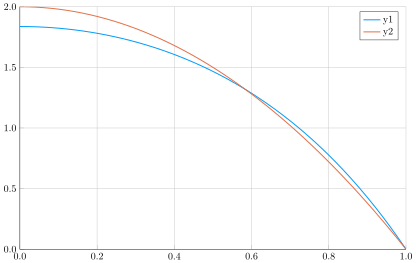

In [12]:
rr = linspace(0,1)

@manipulate for nu = linspace(0,2,11), g=linspace(-1.5,2,21)
    nn = 1 - rr .^ 2
    nn .^= nu
    nn *= 1 + nu

    jj = g^2 * ( 1 - rr .^ 2 ) .* exp.( g * rr .^ 2 ) 
    jj /= ( exp(g) - 1 - g )
    
    plot(rr, jj)
    plot!(rr, nn)
end

In [ ]:
  nu_n = 0.27
  nu_T = 1.094

In [6]:
using Plots
using Interact
using LaTeXStrings
pgfplots()

Plots.PGFPlotsBackend()

In [7]:
    nn = 1 - rr .^ 2
    nn .^= nu
    nn *= 1 + nu

    jj = g^2 * ( 1 - rr .^ 2 ) .* exp.( g * rr .^ 2 ) 
    jj /= ( exp(g) - 1 - g )
    
    plot(rr, jj)
    plot!(rr, nn)

LoadError: [91mUndefVarError: rr not defined[39m

In [14]:
nu_n = 0.27
nu_T = 1.094

tped = 5.5
tsep = 0.1
rped = 0.94
beta_t = 2.0
alpha_t = 1.45

gamma = 1.65

rho = linspace(0,1,500)
rho1 = 1 - rho .^ 2

n = ( 1 + nu_n ) * rho1 .^ nu_n
T = ( 1 + nu_T ) * rho1 .^ nu_T

J = gamma^2 * rho1 .* exp.( gamma * rho .^ 2 ) ./ ( exp(gamma) - 1 - gamma )

return

In [21]:
function tpede(rho)
    if rho <= rped
        tt = 1 - (rho/rped)^beta_t
        tt ^= alpha_t
        tt *=(27.356 - tped)
        tt += tped
    else
        tt = (1-rho)/(1-rped)
        tt *=(tped-tsep)
        tt += tsep
    end
    
    tt /= 13.065
    
    tt
end

TT = tpede.(rho);

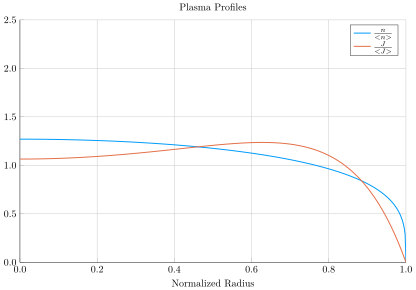

In [26]:
profile_parameters_plot = plot()
title!("Plasma Profiles")
plot!(rho, n, label=L"\frac{n}{<n>}")
plot!(rho, J, label=L"\frac{J}{<J>}")
xlabel!("Normalized Radius")
ylims!(0,2.5)

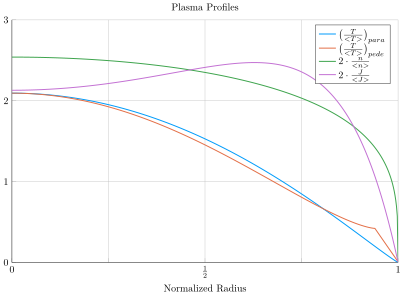

In [62]:
profile_parameters_plot = plot()
title!("Plasma Profiles")
plot!(rho, T, label=L"\left( \frac{T}{<T>} \right)_{para}")
plot!(rho, TT, label=L"\left( \frac{T}{<T>} \right)_{pede}")
plot!(rho, 2*n, label=L"2 \cdot \frac{n}{<n>}", xticks=([0,0.25, 0.5, 0.75, 1],[0,"",L"\frac{1}{2}","",1]))
plot!(rho, 2*J, label=L"2 \cdot \frac{J}{<J>}")
xlabel!("Normalized Radius")
# yticks!([0.5,1,1.5])
# ylims!(0,1.75)
ylims!(0,3)

In [63]:
L"\usepackage{xfrac}"

L"$\usepackage{xfrac}$"

In [64]:
savefig(profile_parameters_plot,"profile_parameters.tex")

In [ ]:
["0", L"\sfrac{1}{2}", "1"]